In [34]:
import pandas as pd
import numpy as np
import string
import random
from scipy.io import loadmat
import matplotlib.pyplot as plt
import metis
import collections
import os
# os.environ["DATASET_DIR"] = "/Users/rustamwarwick/Documents/Warwick/d3-gnn/datasets"
os.environ["DATASET_DIR"] = "/home/rustambaku13/Documents/Warwick/d3-gnn/datasets"


# Tag-Ask-Ubuntu 3029 tags, 271233 simplexes, 1468584 star-expansion

In [4]:
class TagAskUbuntu:
    def __init__(self):
        n_vertices = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "tags-ask-ubuntu","tags-ask-ubuntu-nverts.txt"), header=None)[0].values
        simplices = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "tags-ask-ubuntu","tags-ask-ubuntu-simplices.txt"), header=None)[0].values
        n_labels = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "tags-ask-ubuntu","tags-ask-ubuntu-node-labels.txt"), header=None, delimiter=" ", usecols=[1])[1].values
        simplex_labels = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "tags-ask-ubuntu","tags-ask-ubuntu-simplex-labels.txt"), header=None, delimiter=" ")[0].values
        self.q2t = collections.defaultdict(list) # simplex -> [nodes]
        self.t2q = collections.defaultdict(list) # nodes -> [simplex]
        index = 0
        for simplex_idx in range(n_vertices.shape[0]):
            s = str(simplex_labels[simplex_idx])
            for j in simplices[index:index+n_vertices[simplex_idx]]:
                n_label = n_labels[j-1]
                self.t2q[n_label].append(s)
                self.q2t[s].append(n_label)
            index+=n_vertices[simplex_idx]
            
    def create_files(self):
        def create_file(my_dict, destination):
            with open(destination,"w") as f:
                for key, val in my_dict.items():
                    f.write(f'{key},{",".join(val)}\n')
        create_file(self.q2t, os.path.join(os.environ["DATASET_DIR"], "tags-ask-ubuntu","tags-ask-ubuntu[question-tag].txt"))
        create_file(self.t2q, os.path.join(os.environ["DATASET_DIR"], "tags-ask-ubuntu","tags-ask-ubuntu[tag-question].txt"))
        
    def generate_statistics(self):
        num_nodes = len(self.t2q)
        num_hyperedges = len(self.q2t)
        

In [7]:
acc = 0unique i,j in res.iterrows():
    acc += res[:i][res[:i][0] == j[1]].shape[0]
acc = acc / res.shape[0]
acc, res.groupby(0).count()[1].mean()

(121.25355857915069, 10.28464271614686)

# DBLP 

In [63]:
class DBLP:
    def __init__(self):
        n_vertices = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "coauth-DBLP-full","coauth-DBLP-full-nverts.txt"), header=None)[0].values
        simplices = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "coauth-DBLP-full","coauth-DBLP-full-simplices.txt"), header=None)[0].values
        self.p2a = collections.defaultdict(list) # simplex[publication] -> nodes[author]
        self.a2p = collections.defaultdict(list) # nodes[author] -> simplex[publication]
        index = 0
        for simplex_idx in range(n_vertices.shape[0]):
            ids = "h"+str(simplex_idx)
            for j in simplices[index:index+n_vertices[simplex_idx]]:
                self.a2p[j].append(ids)
                self.p2a[ids].append(j)
            index+=n_vertices[simplex_idx]
            
    def create_files(self):
        def create_file(my_dict, destination):
            with open(destination,"w") as f:
                for key, val in my_dict.items():
                    f.write(f'{str(key)},{",".join(map(str, val))}\n')
        create_file(self.p2a, os.path.join(os.environ["DATASET_DIR"], "coauth-DBLP-full","coauth-DBLP-full[publication-author].txt"))
        create_file(self.a2p, os.path.join(os.environ["DATASET_DIR"], "coauth-DBLP-full","coauth-DBLP-full[author-publication].txt"))
        
    def generate_statistics(self):
        return len(self.p2a),len(self.a2p)
        

In [64]:
a = DBLP()

In [65]:
a.create_files()

# OGB-Products

In [7]:
class OGBProducts:
    def __init__(self):
        dataset = NodePropPredDataset(name = "ogbn-products", root = 'dataset/')
        shuffled_topology = pd.DataFrame(dataset.graph['edge_index'].T).sample(frac=1)
        features = pd.DataFrame(dataset.graph["node_feat"])
        labels = pd.DataFrame(dataset.labels)
    def save():
        shuffled_topology.to_csv(os.path.join(os.environ["DATASET_DIR"], "ogb-products","edges.csv"), header=None, index=False)
        features.to_csv(os.path.join(os.environ["DATASET_DIR"], "ogb-products","node_features.csv"), header=None)
        labels.to_csv(os.path.join(os.environ["DATASET_DIR"], "ogb-products","node_labels.csv"), header=None)

# Stackoverflow

In [25]:
class Stackoverflow:
    def __init__(self, ending="a2q", sep=' '):
        self.ending = ending
        self.dataset = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "sx-stackoverflow", f"sx-stackoverflow-{ending}.txt"), header=None, sep=sep)
        
    def save(self):
        self.dataset.to_csv(os.path.join(os.environ["DATASET_DIR"], "sx-stackoverflow", f"sx-stackoverflow-{self.ending}.tsv"),sep='\t', index=False, header=False)

In [26]:
a = Stackoverflow()

In [35]:
out_degrees = a.dataset.groupby(0).apply(lambda x: x.shape[0]).values

(array([6.16814814e-03, 4.39266493e-05, 1.29409688e-05, 6.40761893e-06,
        3.66016605e-06, 2.14673861e-06, 1.52739754e-06, 9.77906959e-07,
        7.26445170e-07, 6.51937973e-07, 4.33073082e-07, 3.95819483e-07,
        3.25968986e-07, 2.60775189e-07, 2.28178290e-07, 1.95581392e-07,
        1.49014394e-07, 1.39700994e-07, 1.25730895e-07, 1.07104096e-07,
        5.12236979e-08, 7.91638967e-08, 6.51937973e-08, 4.65669980e-08,
        6.98504971e-08, 5.58803977e-08, 4.19102982e-08, 3.25968986e-08,
        9.31339961e-09, 4.65669980e-08, 2.32834990e-08, 3.72535984e-08,
        9.31339961e-09, 4.65669980e-09, 1.86267992e-08, 1.86267992e-08,
        1.86267992e-08, 9.31339961e-09, 9.31339961e-09, 1.86267992e-08,
        9.31339961e-09, 1.39700994e-08, 4.65669980e-09, 4.65669980e-09,
        4.65669980e-09, 4.65669980e-09, 9.31339961e-09, 4.65669980e-09,
        4.65669980e-09, 4.65669980e-09, 4.65669980e-09, 0.00000000e+00,
        4.65669980e-09, 4.65669980e-09, 0.00000000e+00, 4.656699

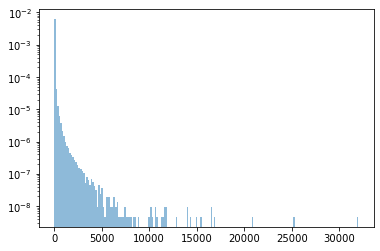

In [39]:
plt.hist(out_degrees, bins=200, density=True, alpha=0.5, log=True)

# Wikitalk 

In [49]:
class Wikitalk:
    def __init__(self, sep=' '):
        self.dataset = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "wikitalk", "wiki-talk-temporal.txt"), header=None, sep=sep)
        
    def save(self):
        self.dataset.to_csv(os.path.join(os.environ["DATASET_DIR"], "wikitalk", "wiki-talk-temporal.tsv"),sep='\t', index=False, header=False)

In [50]:
a = Wikitalk()

In [46]:
out_degrees = a.dataset.groupby(0).apply(lambda x: x.shape[0]).values

(array([7.52020474e-04, 1.78260891e-06, 5.98211085e-07, 2.85578156e-07,
        1.11225177e-07, 6.91399747e-08, 3.60730303e-08, 9.01825757e-09,
        1.50304293e-08, 9.01825757e-09, 6.01217171e-09, 0.00000000e+00,
        3.00608586e-09, 3.00608586e-09, 3.00608586e-09, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00608586e-09,
        6.01217171e-09, 6.01217171e-09, 3.00608586e-09, 0.00000000e+00,
        3.00608586e-09, 6.01217171e-09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00608586e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00608586e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

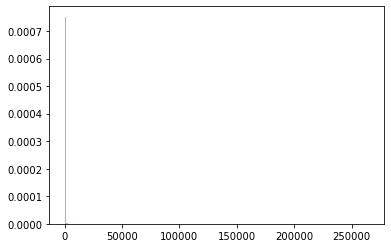

In [48]:
plt.hist(out_degrees, bins=200, density=True, alpha=0.5)

# Sx-Superuser

In [57]:
class SuperUser:
    def __init__(self, sep=' '):
        self.dataset = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "sx-superuser", "sx-superuser.txt"), header=None, sep=sep)
        
    def save(self):
        self.dataset.to_csv(os.path.join(os.environ["DATASET_DIR"], "sx-superuser", "sx-superuser.tsv"),sep='\t', index=False, header=False)

(array([7.35563424e-03, 2.68513145e-05, 9.70921235e-06, 4.50618947e-06,
        2.83378925e-06, 1.85822246e-06, 1.25430016e-06, 9.29111230e-07,
        4.18100054e-07, 7.89744546e-07, 4.64555615e-07, 1.39366685e-07,
        2.78733369e-07, 2.32277808e-07, 2.78733369e-07, 1.39366685e-07,
        2.32277808e-07, 3.25188931e-07, 9.29111230e-08, 4.64555615e-08,
        9.29111230e-08, 9.29111230e-08, 4.64555615e-08, 9.29111230e-08,
        9.29111230e-08, 9.29111230e-08, 9.29111230e-08, 4.64555615e-08,
        1.85822246e-07, 9.29111230e-08, 0.00000000e+00, 4.64555615e-08,
        0.00000000e+00, 4.64555615e-08, 0.00000000e+00, 4.64555615e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.64555615e-08, 4.64555615e-08,
        4.64555615e-08, 4.64555615e-08, 0.00000000e+00, 0.00000000e+00,
        4.64555615e-08, 4.64555615e-08, 0.00000000e+00, 0.00000000e+00,
        4.64555615e-08, 0.00000000e+00, 0.00000000e+00, 0.000000

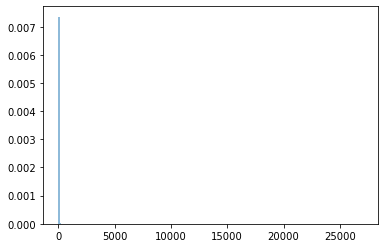

In [56]:
out_degrees = a.dataset.groupby(0).apply(lambda x: x.shape[0]).values
plt.hist(out_degrees, bins=200, density=True, alpha=0.5)

# Reddit Hyperlinks

In [112]:
class RedditHyperlinks:
    def __init__(self, ending='body', sep=',', usecols=None):
        self.ending = ending
        self.dataset = pd.read_csv(os.path.join(os.environ["DATASET_DIR"], "RedditHyperlinks", f"soc-redditHyperlinks-{ending}.tsv"), usecols=usecols, sep=sep, header=None)
        nodes = set(a.dataset[0].unique())
        nodes.update(a.dataset[1].unique())
        self.nodes_2_index = dict(zip(nodes, range(len(nodes))))
        
    def partition(self, num_partitions):
        src = self.dataset[0].map(self.nodes_2_index).values
        dest = self.dataset[1].map(self.nodes_2_index).values
        adj_list = [[] for _ in range(len(self.nodes_2_index))]
        for i in range(len(src)):
            found = False
            for j in adj_list[src[i]]:
                if j[0] == dest[i]:
                    j[1]+=1
                    found = True
                    break
            if not found:
                adj_list[src[i]].append([dest[i], 1])
        parts = metis.part_graph(adj_list, num_partitions)[1]
        self.dataset[3] = self.dataset[0].map(self.nodes_2_index).map(lambda x: parts[x])
        return parts
    def save(self):
        self.dataset.to_csv(os.path.join(os.environ["DATASET_DIR"], "RedditHyperlinks", f"soc-redditHyperlinks-{self.ending}.tsv"),sep='\t', index=False, header=False)

In [113]:
a = RedditHyperlinks(sep='\t', usecols=[0,1,2])

In [115]:
parts = a.partition(10)


In [141]:
a.dataset[1]

0           teamredditteams
1                    soccer
2                    bikela
3                       cfb
4                   gamedev
                ...        
286556        debatefascism
286557            justnomil
286558    blackdesertonline
286559            askreddit
286560      dataisbeautiful
Name: 1, Length: 286561, dtype: object

In [133]:
np.append(a.dataset[3].values,[1])

array([9, 0, 1, ..., 2, 5, 1])

In [135]:
a.dataset[1][0]

'teamredditteams'

# DGraph

In [ ]:
npzarr = np.load(os.path.join(os.environ["DATASET_DIR"], "DGraphFin", "dgraphfin.npz"))

In [72]:
def create_edge_list_file(npzarr):
    order = npzarr['edge_timestamp'].argsort()
    edges_ts = np.hstack((npzarr['edge_index'][order], npzarr['edge_timestamp'][order].reshape((1, -1)).T))
    pd.DataFrame(edges_ts).to_csv(os.path.join(os.environ["DATASET_DIR"], "DGraphFin", "edge-list.csv"), index=False, header=False)

In [6]:
def create_feature_and_labels(npzarr):
    np.save(os.path.join(os.environ["DATASET_DIR"], "DGraphFin", "node_features"), npzarr['x'].astype("float32"))
    np.save(os.path.join(os.environ["DATASET_DIR"], "DGraphFin", "node_labels"), npzarr['y'].astype("int8"))

In [7]:
create_feature_and_labels(npzarr)